In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [313]:
from scipy.stats import chi2_contingency, fisher_exact, ttest_ind
from IPython.display import display
import dataframe_image as dfi


In [1]:
data = pd.read_csv('PCC.individual.project.data.csv')
data =  data.loc[data['STUDYID'] != 'ASC']


NameError: name 'pd' is not defined

In [269]:
# data.head()


In [270]:
# list(data.columns)

## Clean Data to get event free survival

In [271]:
def get_risk(patient):
    if patient.death == 1 and patient.time < 365:
        # Patient is high risk
        return 1
    # WAS: elif patient.death == 0 and patient.time > 730:
    elif patient.time > 730:
        # Patient is low risk
        return 0
    else:
        # Patient needs to be dropped, insufficient data
        return 'drop'


In [272]:
# data.apply(get_risk, axis=1)

In [273]:
data['high_risk'] = data.apply(get_risk, axis=1)
data = data.loc[lambda patient: patient.high_risk != 'drop']


In [274]:
data = data.drop(['time', 'death'], axis=1)

In [275]:
data.shape

(561, 104)

In [276]:
data.groupby('AGEGRP2').count()

,STUDYID,RPT,BMI,HEIGHTBL,WEIGHTBL,ALP,ALT,AST,CA,CREAT,...,RaceAsian,RaceBlack,RaceOther,RaceWhite,RegionAsia,RegionEastEuro,RegionNorthAmer,RegionSouthAmer,RegionWestEuro,high_risk
AGEGRP2,,,,,,,,,,,,,,,,,,,,,
0,181,181,181,181,181,181,181,181,181,181,...,181,181,181,181,181,181,181,181,181,181
1,246,246,246,246,246,246,246,246,246,246,...,246,246,246,246,246,246,246,246,246,246
2,134,134,134,134,134,134,134,134,134,134,...,134,134,134,134,134,134,134,134,134,134


In [277]:
data.groupby('ECOG_C').count()

,STUDYID,RPT,BMI,HEIGHTBL,WEIGHTBL,ALP,ALT,AST,CA,CREAT,...,RaceAsian,RaceBlack,RaceOther,RaceWhite,RegionAsia,RegionEastEuro,RegionNorthAmer,RegionSouthAmer,RegionWestEuro,high_risk
ECOG_C,,,,,,,,,,,,,,,,,,,,,
0,256,256,256,256,256,256,256,256,256,256,...,256,256,256,256,256,256,256,256,256,256
1,305,305,305,305,305,305,305,305,305,305,...,305,305,305,305,305,305,305,305,305,305


In [278]:
data.head()

,STUDYID,RPT,BMI,HEIGHTBL,WEIGHTBL,ALP,ALT,AST,CA,CREAT,...,RaceAsian,RaceBlack,RaceOther,RaceWhite,RegionAsia,RegionEastEuro,RegionNorthAmer,RegionSouthAmer,RegionWestEuro,high_risk
2,ASC,ASC-001-0005,26.2000,167.9,73.90000,5.068904,2.639057,2.890372,2.27,4.663439,...,0,0,0,1,0,0,0,0,0,1
3,ASC,ASC-001-0008,26.9915,166.7,83.50879,4.812184,3.761200,3.688879,2.20,4.820282,...,0,0,0,1,0,0,0,0,0,1
6,ASC,ASC-001-0013,32.2000,176.9,100.70000,4.941642,2.772589,3.044522,2.45,4.574711,...,0,0,0,1,0,0,0,0,0,1
16,ASC,ASC-003-0002,25.8000,163.0,68.60000,6.306275,5.135798,5.521461,2.25,4.574711,...,0,0,0,1,0,0,0,0,0,1
21,ASC,ASC-003-0009,25.1000,178.0,79.60000,6.511745,2.079442,3.526361,2.25,5.123964,...,0,0,0,1,0,0,0,0,0,1


/Users/belalelsiesy/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='high_risk', ylabel='count'>

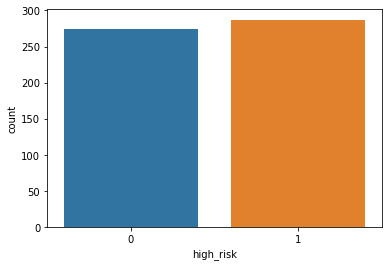

In [279]:
sns.countplot(data['high_risk'])

## Race

In [280]:
race = ['RaceAsian',
        'RaceBlack',
        'RaceOther',
        'RaceWhite']


In [281]:
def get_race(data):
    if data['RaceWhite'] == 1:
        return 'White'
    elif data['RaceBlack'] == 1:
        return 'Black'
    elif data['RaceAsian'] == 1:
        return 'Asian'
    else:
        return 'Other'

In [282]:
data['Race'] = data[race].apply(get_race, axis=1)


In [283]:
race_table = pd.crosstab(index=data['high_risk'], columns=data['Race'])
race_table

Race,Asian,Black,Other,White
high_risk,,,,
0,19,11,4,240
1,6,11,14,256


In [284]:
chi = chi2_contingency(race_table)
print("chi2:  %.2f \n p:  %.2f \n dof:  %.2f \n expected: " % (chi[0], chi[1],chi[2]))
print(chi[3])


chi2:  12.54 
 p:  0.01 
 dof:  3.00 
 expected: 
[[ 12.21033868  10.74509804   8.79144385 242.25311943]
 [ 12.78966132  11.25490196   9.20855615 253.74688057]]


## Region

In [285]:
region = ['RegionAsia',
          'RegionEastEuro',
          'RegionNorthAmer',
          'RegionSouthAmer',
          'RegionWestEuro']


In [286]:
def get_region(data):
    if data['RegionAsia'] == 1:
        return 'Asia'
    elif data['RegionEastEuro'] == 1:
        return 'EastEuro'
    elif data['RegionNorthAmer'] == 1:
        return 'NorthAmer'
    elif data['RegionSouthAmer'] == 1:
        return 'SouthAmer'
    else:
        return 'WestEuro'


In [287]:
data['Region'] = data[region].apply(get_region, axis=1)


In [288]:
region_table = pd.crosstab(
    index=data['high_risk'], columns=data['Region'], margins=True)
region_table


Region,EastEuro,NorthAmer,SouthAmer,WestEuro,All
high_risk,,,,,
0,48,39,39,148,274
1,50,37,19,181,287
All,98,76,58,329,561


In [289]:
chi = chi2_contingency(region_table)
print("chi2:  %.2f \n p:  %.2f \n dof:  %.2f \n expected: " % (chi[0], chi[1],chi[2]))
print(chi[3])

chi2:  10.00 
 p:  0.26 
 dof:  8.00 
 expected: 
[[ 47.86452763  37.11942959  28.32798574 160.68805704 274.        ]
 [ 50.13547237  38.88057041  29.67201426 168.31194296 287.        ]
 [ 98.          76.          58.         329.         561.        ]]


In [290]:
for i in range(101):
    print(" {0} - {1}".format(data.columns[i], data.iloc[200][i]))

 STUDYID - VEN
 RPT - VEN-136006901
 BMI - 23.0
 HEIGHTBL - 168.0
 WEIGHTBL - 65.0
 ALP - 6.558197803
 ALT - 3.63758616
 AST - 3.713572067
 CA - 2.21
 CREAT - 4.180766877
 HB - 11.3
 LDH - 5.917112722
 NEU - 1.572773928
 PLT - 252.0
 PSA - 7.607878073
 TBILI - 2.041220329
 TESTO - -4.976233867
 WBC - 1.983756292
 CREACL - 4.441582911
 NA. - 136.3
 MG - -0.116533816
 PHOS - 0.09531018
 ALB - 34.3
 TPRO - 71.7
 RBC - 3.864001404
 LYM - 0.39084558
 BUN - 1.796033162
 CCRC - 4.721627899
 GLU - 1.733777187
 SYSTOLICBP - 120.0
 DIASTOLICBP - 56.0
 PULSE - 78.16997067
 HEMAT - 0.349296135
 SPEGRA - 1.020414053
 LYMperLEU - 22.10709817
 MONO - 0.397338895
 MONOperLEU - 6.298281473
 NEUperLEU - 69.12515918
 POT - 4.99
 BASOperLEU - 0.448847278
 EOS - 0.112579001
 EOSperLEU - 1.661713321
 TARGET - 1
 LYMPH_NODES - 1
 KIDNEYS - 0
 LUNGS - 0
 LIVER - 0
 PLEURA - 0
 OTHER - 0
 PROSTATE - 1
 ORCHIDECTOMY - 0
 PROSTATECTOMY - 0
 LYMPHADENECTOMY - 0
 BILATERAL_ORCHIDECTOMY - 0
 PRIOR_RADIOTHERAPY - 0


# Chi-Square Test for Binary Variables

In [291]:
binary = ['TARGET',
'LYMPH_NODES',
'KIDNEYS',
'LUNGS',
'LIVER',
'PLEURA',
'OTHER',
'PROSTATE',
'ORCHIDECTOMY',
'PROSTATECTOMY',
'LYMPHADENECTOMY',
'BILATERAL_ORCHIDECTOMY',
'PRIOR_RADIOTHERAPY',
'ANALGESICS',
'ANTI_ANDROGENS',
'GLUCOCORTICOID',
'GONADOTROPIN',
'BISPHOSPHONATE',
'CORTICOSTEROID',
'IMIDAZOLE',
'ACE_INHIBITORS',
'BETA_BLOCKING',
'HMG_COA_REDUCT',
'ESTROGENS',
'ANTI_ESTROGENS',
'CEREBACC',
'CHF',
'DVT',
'DIAB',
'MI',
'PULMEMB',
'SPINCOMP',
'COPD',
'MHBLOOD',
'MHCARD',
'MHCONGEN',
'MHEAR',
'MHENDO',
'MHGASTRO',
'MHHEPATO',
'MHIMMUNE',
'MHINFECT',
'MHINJURY',
'MHINVEST',
'MHMETAB',
'MHPSYCH',
'MHRENAL',
'MHRESP',
'MHSKIN',
'MHVASC',
'ECOG_C',
'AGEGRP2'
]

In [292]:
binary_stats = pd.DataFrame(columns=['Name', 'chi-2','chi-p', 'Odds-Ratio','fisher-p'])


In [293]:
# binary_stats.loc[len(binary_stats.index)] = ['Hello',0.05, 6.07]


In [311]:
def analyse_binary(name):
    print(name)
    table = pd.crosstab(index=data['high_risk'], columns=data[name])
    disp_table = pd.crosstab(index=data['high_risk'], columns=data[name], margins=True)
    display(disp_table)
    chi = chi2_contingency(table)
    if (table.shape == (2,2)):
        oddsr, fisherP = fisher_exact(table)
        print('Fisher Exact Test: \n Odds: %.2f \n p: %.2f' % (oddsr, fisherP))
        binary_stats.loc[len(binary_stats.index)] = [name, chi[0], chi[1], oddsr, fisherP]
    else:
        binary_stats.loc[len(binary_stats.index)] = [
            name, chi[0], chi[1], np.NaN, np.NaN]
    print('\n')
    if (chi[1] <= 0.0005):
        filename = "/Users/belalelsiesy/Desktop/Data Analysis/newData/" + name + ".png"
        dfi.export(disp_table, filename)


In [312]:
for feature in binary:
    analyse_binary(feature)

TARGET


TARGET,0,1,All
high_risk,,,
0,125,149,274
1,145,142,287
All,270,291,561


Fisher Exact Test: 
 Odds: 0.82 
 p: 0.27


LYMPH_NODES


LYMPH_NODES,0,1,All
high_risk,,,
0,134,140,274
1,138,149,287
All,272,289,561


Fisher Exact Test: 
 Odds: 1.03 
 p: 0.87


KIDNEYS


KIDNEYS,0,1,All
high_risk,,,
0,272,2,274
1,284,3,287
All,556,5,561


Fisher Exact Test: 
 Odds: 1.44 
 p: 1.00


LUNGS


LUNGS,0,1,All
high_risk,,,
0,244,30,274
1,249,38,287
All,493,68,561


Fisher Exact Test: 
 Odds: 1.24 
 p: 0.44


LIVER


LIVER,0,1,All
high_risk,,,
0,257,17,274
1,249,38,287
All,506,55,561


Fisher Exact Test: 
 Odds: 2.31 
 p: 0.01


PLEURA


PLEURA,0,1,All
high_risk,,,
0,270,4,274
1,278,9,287
All,548,13,561


Fisher Exact Test: 
 Odds: 2.19 
 p: 0.26


OTHER


OTHER,0,1,All
high_risk,,,
0,270,4,274
1,279,8,287
All,549,12,561


Fisher Exact Test: 
 Odds: 1.94 
 p: 0.38


PROSTATE


PROSTATE,0,1,All
high_risk,,,
0,226,48,274
1,262,25,287
All,488,73,561


Fisher Exact Test: 
 Odds: 0.45 
 p: 0.00


ORCHIDECTOMY


ORCHIDECTOMY,0,1,All
high_risk,,,
0,211,63,274
1,229,58,287
All,440,121,561


Fisher Exact Test: 
 Odds: 0.85 
 p: 0.47


PROSTATECTOMY


PROSTATECTOMY,0,1,All
high_risk,,,
0,194,80,274
1,219,68,287
All,413,148,561


Fisher Exact Test: 
 Odds: 0.75 
 p: 0.15


LYMPHADENECTOMY


LYMPHADENECTOMY,0,1,All
high_risk,,,
0,230,44,274
1,261,26,287
All,491,70,561


Fisher Exact Test: 
 Odds: 0.52 
 p: 0.01


BILATERAL_ORCHIDECTOMY


BILATERAL_ORCHIDECTOMY,0,1,All
high_risk,,,
0,213,61,274
1,244,43,287
All,457,104,561


Fisher Exact Test: 
 Odds: 0.62 
 p: 0.03


PRIOR_RADIOTHERAPY


PRIOR_RADIOTHERAPY,0,1,All
high_risk,,,
0,126,148,274
1,129,158,287
All,255,306,561


Fisher Exact Test: 
 Odds: 1.04 
 p: 0.87


ANALGESICS


ANALGESICS,0,1,All
high_risk,,,
0,217,57,274
1,174,113,287
All,391,170,561


Fisher Exact Test: 
 Odds: 2.47 
 p: 0.00


ANTI_ANDROGENS


ANTI_ANDROGENS,0,1,All
high_risk,,,
0,22,252,274
1,31,256,287
All,53,508,561


Fisher Exact Test: 
 Odds: 0.72 
 p: 0.31


GLUCOCORTICOID


GLUCOCORTICOID,0,1,All
high_risk,,,
0,195,79,274
1,174,113,287
All,369,192,561


Fisher Exact Test: 
 Odds: 1.60 
 p: 0.01


GONADOTROPIN


GONADOTROPIN,0,1,All
high_risk,,,
0,39,235,274
1,49,238,287
All,88,473,561


Fisher Exact Test: 
 Odds: 0.81 
 p: 0.42


BISPHOSPHONATE


BISPHOSPHONATE,0,1,All
high_risk,,,
0,158,116,274
1,172,115,287
All,330,231,561


Fisher Exact Test: 
 Odds: 0.91 
 p: 0.61


CORTICOSTEROID


CORTICOSTEROID,0,1,All
high_risk,,,
0,201,73,274
1,244,43,287
All,445,116,561


Fisher Exact Test: 
 Odds: 0.49 
 p: 0.00


IMIDAZOLE


IMIDAZOLE,0,1,All
high_risk,,,
0,250,24,274
1,264,23,287
All,514,47,561


Fisher Exact Test: 
 Odds: 0.91 
 p: 0.76


ACE_INHIBITORS


ACE_INHIBITORS,0,1,All
high_risk,,,
0,209,65,274
1,229,58,287
All,438,123,561


Fisher Exact Test: 
 Odds: 0.81 
 p: 0.36


BETA_BLOCKING


BETA_BLOCKING,0,1,All
high_risk,,,
0,220,54,274
1,227,60,287
All,447,114,561


Fisher Exact Test: 
 Odds: 1.08 
 p: 0.75


HMG_COA_REDUCT


HMG_COA_REDUCT,0,1,All
high_risk,,,
0,211,63,274
1,221,66,287
All,432,129,561


Fisher Exact Test: 
 Odds: 1.00 
 p: 1.00


ESTROGENS


ESTROGENS,0,1,All
high_risk,,,
0,235,39,274
1,264,23,287
All,499,62,561


Fisher Exact Test: 
 Odds: 0.52 
 p: 0.02


ANTI_ESTROGENS


ANTI_ESTROGENS,0,1,All
high_risk,,,
0,271,3,274
1,285,2,287
All,556,5,561


Fisher Exact Test: 
 Odds: 0.63 
 p: 0.68


CEREBACC


CEREBACC,0,1,All
high_risk,,,
0,267,7,274
1,280,7,287
All,547,14,561


Fisher Exact Test: 
 Odds: 0.95 
 p: 1.00


CHF


CHF,0,1,All
high_risk,,,
0,273,1,274
1,279,8,287
All,552,9,561


Fisher Exact Test: 
 Odds: 7.83 
 p: 0.04


DVT


DVT,0,1,All
high_risk,,,
0,265,9,274
1,280,7,287
All,545,16,561


Fisher Exact Test: 
 Odds: 0.74 
 p: 0.62


DIAB


DIAB,0,1,All
high_risk,,,
0,226,48,274
1,228,59,287
All,454,107,561


Fisher Exact Test: 
 Odds: 1.22 
 p: 0.39


MI


MI,0,1,All
high_risk,,,
0,264,10,274
1,262,25,287
All,526,35,561


Fisher Exact Test: 
 Odds: 2.52 
 p: 0.01


PULMEMB


PULMEMB,0,1,All
high_risk,,,
0,272,2,274
1,282,5,287
All,554,7,561


Fisher Exact Test: 
 Odds: 2.41 
 p: 0.45


SPINCOMP


SPINCOMP,0,1,All
high_risk,,,
0,271,3,274
1,285,2,287
All,556,5,561


Fisher Exact Test: 
 Odds: 0.63 
 p: 0.68


COPD


COPD,0,1,All
high_risk,,,
0,270,4,274
1,280,7,287
All,550,11,561


Fisher Exact Test: 
 Odds: 1.69 
 p: 0.55


MHBLOOD


MHBLOOD,0,1,All
high_risk,,,
0,266,8,274
1,271,16,287
All,537,24,561


Fisher Exact Test: 
 Odds: 1.96 
 p: 0.15


MHCARD


MHCARD,0,1,All
high_risk,,,
0,230,44,274
1,221,66,287
All,451,110,561


Fisher Exact Test: 
 Odds: 1.56 
 p: 0.04


MHCONGEN


MHCONGEN,0,1,All
high_risk,,,
0,270,4,274
1,282,5,287
All,552,9,561


Fisher Exact Test: 
 Odds: 1.20 
 p: 1.00


MHEAR


MHEAR,0,1,All
high_risk,,,
0,265,9,274
1,283,4,287
All,548,13,561


Fisher Exact Test: 
 Odds: 0.42 
 p: 0.17


MHENDO


MHENDO,0,1,All
high_risk,,,
0,266,8,274
1,283,4,287
All,549,12,561


Fisher Exact Test: 
 Odds: 0.47 
 p: 0.25


MHGASTRO


MHGASTRO,0,1,All
high_risk,,,
0,197,77,274
1,208,79,287
All,405,156,561


Fisher Exact Test: 
 Odds: 0.97 
 p: 0.92


MHHEPATO


MHHEPATO,0,1,All
high_risk,,,
0,265,9,274
1,279,8,287
All,544,17,561


Fisher Exact Test: 
 Odds: 0.84 
 p: 0.81


MHIMMUNE


MHIMMUNE,0,1,All
high_risk,,,
0,266,8,274
1,280,7,287
All,546,15,561


Fisher Exact Test: 
 Odds: 0.83 
 p: 0.80


MHINFECT


MHINFECT,0,1,All
high_risk,,,
0,242,32,274
1,252,35,287
All,494,67,561


Fisher Exact Test: 
 Odds: 1.05 
 p: 0.90


MHINJURY


MHINJURY,0,1,All
high_risk,,,
0,253,21,274
1,272,15,287
All,525,36,561


Fisher Exact Test: 
 Odds: 0.66 
 p: 0.30


MHINVEST


MHINVEST,0,1,All
high_risk,,,
0,238,36,274
1,265,22,287
All,503,58,561


Fisher Exact Test: 
 Odds: 0.55 
 p: 0.04


MHMETAB


MHMETAB,0,1,All
high_risk,,,
0,174,100,274
1,186,101,287
All,360,201,561


Fisher Exact Test: 
 Odds: 0.94 
 p: 0.79


MHPSYCH


MHPSYCH,0,1,All
high_risk,,,
0,249,25,274
1,250,37,287
All,499,62,561


Fisher Exact Test: 
 Odds: 1.47 
 p: 0.18


MHRENAL


MHRENAL,0,1,All
high_risk,,,
0,220,54,274
1,227,60,287
All,447,114,561


Fisher Exact Test: 
 Odds: 1.08 
 p: 0.75


MHRESP


MHRESP,0,1,All
high_risk,,,
0,244,30,274
1,246,41,287
All,490,71,561


Fisher Exact Test: 
 Odds: 1.36 
 p: 0.25


MHSKIN


MHSKIN,0,1,All
high_risk,,,
0,263,11,274
1,275,12,287
All,538,23,561


Fisher Exact Test: 
 Odds: 1.04 
 p: 1.00


MHVASC


MHVASC,0,1,All
high_risk,,,
0,114,160,274
1,168,119,287
All,282,279,561


Fisher Exact Test: 
 Odds: 0.50 
 p: 0.00


ECOG_C


ECOG_C,0,1,All
high_risk,,,
0,152,122,274
1,104,183,287
All,256,305,561


Fisher Exact Test: 
 Odds: 2.19 
 p: 0.00


AGEGRP2


AGEGRP2,0,1,2,All
high_risk,,,,
0,92,130,52,274
1,89,116,82,287
All,181,246,134,561


In [296]:
binary_stats

,Name,chi-2,chi-p,Odds-Ratio,fisher-p
0,TARGET,1.160124,0.281440,0.821569,0.271961
1,LYMPH_NODES,0.012124,0.912324,1.033437,0.866043
2,KIDNEYS,0.002711,0.958479,1.436620,1.000000
3,LUNGS,0.492627,0.482758,1.241232,0.439038
4,LIVER,7.072115,0.007829,2.307111,0.006559
5,PLEURA,1.077910,0.299165,2.185252,0.262906
6,OTHER,0.631241,0.426901,1.935484,0.384054
7,PROSTATE,8.843884,0.002941,0.449268,0.002433
8,ORCHIDECTOMY,0.488064,0.484792,0.848271,0.472471
9,PROSTATECTOMY,1.912020,0.166739,0.752968,0.151064


In [297]:
binary_stats[binary_stats['chi-p'] <= 0.0005].sort_values(by='chi-p')

,Name,chi-2,chi-p,Odds-Ratio,fisher-p
13,ANALGESICS,22.016201,0.000003,2.472373,0.000002
50,ECOG_C,20.141753,0.000007,2.192308,0.000007
49,MHVASC,15.402783,0.000087,0.504687,0.000071


In [298]:
binary_stats[binary_stats['fisher-p'] <= 0.0005].sort_values(by='fisher-p')


,Name,chi-2,chi-p,Odds-Ratio,fisher-p
13,ANALGESICS,22.016201,0.000003,2.472373,0.000002
50,ECOG_C,20.141753,0.000007,2.192308,0.000007
49,MHVASC,15.402783,0.000087,0.504687,0.000071


In [299]:
binary_stats.sort_values(by='fisher-p')


,Name,chi-2,chi-p,Odds-Ratio,fisher-p
13,ANALGESICS,22.016201,0.000003,2.472373,0.000002
50,ECOG_C,20.141753,0.000007,2.192308,0.000007
49,MHVASC,15.402783,0.000087,0.504687,0.000071
18,CORTICOSTEROID,10.918660,0.000952,0.485235,0.000806
7,PROSTATE,8.843884,0.002941,0.449268,0.002433
4,LIVER,7.072115,0.007829,2.307111,0.006559
15,GLUCOCORTICOID,6.458106,0.011045,1.603012,0.009811
29,MI,5.303501,0.021283,2.519084,0.014403
10,LYMPHADENECTOMY,5.663359,0.017323,0.520724,0.014849
23,ESTROGENS,4.901559,0.026832,0.524961,0.021828


# Continous Variables

In [300]:
continous = ['BMI',
             'HEIGHTBL',
             'WEIGHTBL',
             'ALP',
             'ALT',
             'AST',
             'CA',
             'CREAT',
             'HB',
             'LDH',
             'NEU',
             'PLT',
             'PSA',
             'TBILI',
             'TESTO',
             'WBC',
             'CREACL',
             'NA.',
             'MG',
             'PHOS',
             'ALB',
             'TPRO',
             'RBC',
             'LYM',
             'BUN',
             'CCRC',
             'GLU',
             'SYSTOLICBP',
             'DIASTOLICBP',
             'PULSE',
             'HEMAT',
             'SPEGRA',
             'LYMperLEU',
             'MONO',
             'MONOperLEU',
             'NEUperLEU',
             'POT',
             'BASOperLEU',
             'EOS',
             'EOSperLEU']


In [301]:
continous_stats = pd.DataFrame(columns=['Name', 'Stat', 'p'])


In [302]:
def analyse_continuous(name):
    stat, p = ttest_ind(a=data[name][data['high_risk'] == 0],
                        b=data[name][data['high_risk'] == 1])
    continous_stats.loc[len(continous_stats.index)] = [name, stat, p]
    plt.figure(figsize=(6,4))
    plot = sns.boxplot(x="high_risk", y=name, data=data)
    display(plot)
    if (p <= 0.0005):
        filename = "/Users/belalelsiesy/Desktop/Data Analysis/newData/" + name + ".png"
        plt.savefig(filename, transparent=True)
    
    
    
    


<AxesSubplot:xlabel='high_risk', ylabel='BMI'>

<AxesSubplot:xlabel='high_risk', ylabel='HEIGHTBL'>

<AxesSubplot:xlabel='high_risk', ylabel='WEIGHTBL'>

<AxesSubplot:xlabel='high_risk', ylabel='ALP'>

<AxesSubplot:xlabel='high_risk', ylabel='ALT'>

<AxesSubplot:xlabel='high_risk', ylabel='AST'>

<AxesSubplot:xlabel='high_risk', ylabel='CA'>

<AxesSubplot:xlabel='high_risk', ylabel='CREAT'>

<AxesSubplot:xlabel='high_risk', ylabel='HB'>

<AxesSubplot:xlabel='high_risk', ylabel='LDH'>

<AxesSubplot:xlabel='high_risk', ylabel='NEU'>

<AxesSubplot:xlabel='high_risk', ylabel='PLT'>

<AxesSubplot:xlabel='high_risk', ylabel='PSA'>

<AxesSubplot:xlabel='high_risk', ylabel='TBILI'>

<AxesSubplot:xlabel='high_risk', ylabel='TESTO'>

<AxesSubplot:xlabel='high_risk', ylabel='WBC'>

<AxesSubplot:xlabel='high_risk', ylabel='CREACL'>

<AxesSubplot:xlabel='high_risk', ylabel='NA.'>

<AxesSubplot:xlabel='high_risk', ylabel='MG'>

<AxesSubplot:xlabel='high_risk', ylabel='PHOS'>

<ipython-input-302-2f57f21140c0>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,4))


<AxesSubplot:xlabel='high_risk', ylabel='ALB'>

<AxesSubplot:xlabel='high_risk', ylabel='TPRO'>

<AxesSubplot:xlabel='high_risk', ylabel='RBC'>

<AxesSubplot:xlabel='high_risk', ylabel='LYM'>

<AxesSubplot:xlabel='high_risk', ylabel='BUN'>

<AxesSubplot:xlabel='high_risk', ylabel='CCRC'>

<AxesSubplot:xlabel='high_risk', ylabel='GLU'>

<AxesSubplot:xlabel='high_risk', ylabel='SYSTOLICBP'>

<AxesSubplot:xlabel='high_risk', ylabel='DIASTOLICBP'>

<AxesSubplot:xlabel='high_risk', ylabel='PULSE'>

<AxesSubplot:xlabel='high_risk', ylabel='HEMAT'>

<AxesSubplot:xlabel='high_risk', ylabel='SPEGRA'>

<AxesSubplot:xlabel='high_risk', ylabel='LYMperLEU'>

<AxesSubplot:xlabel='high_risk', ylabel='MONO'>

<AxesSubplot:xlabel='high_risk', ylabel='MONOperLEU'>

<AxesSubplot:xlabel='high_risk', ylabel='NEUperLEU'>

<AxesSubplot:xlabel='high_risk', ylabel='POT'>

<AxesSubplot:xlabel='high_risk', ylabel='BASOperLEU'>

<AxesSubplot:xlabel='high_risk', ylabel='EOS'>

<AxesSubplot:xlabel='high_risk', ylabel='EOSperLEU'>

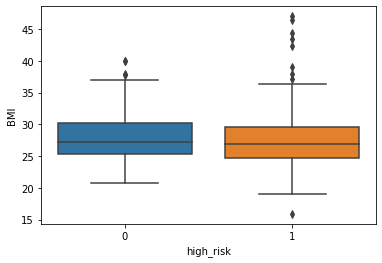

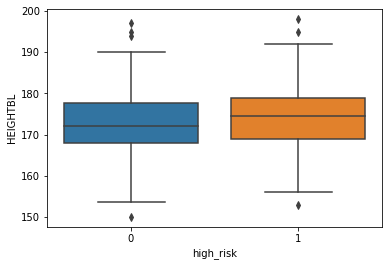

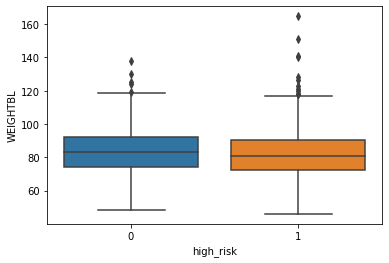

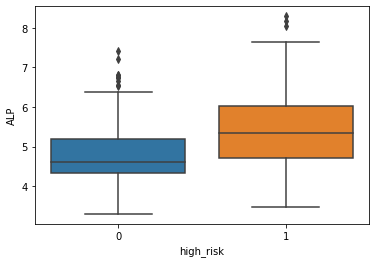

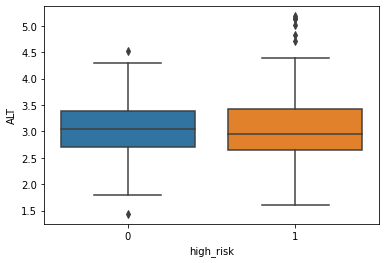

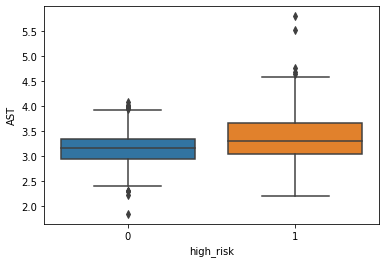

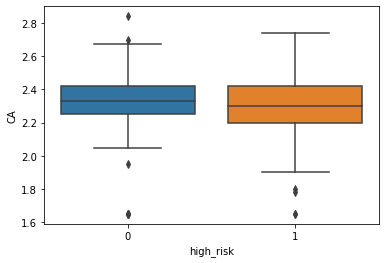

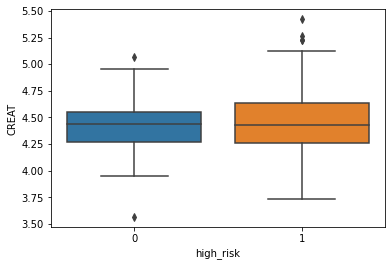

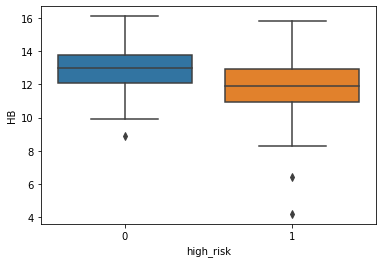

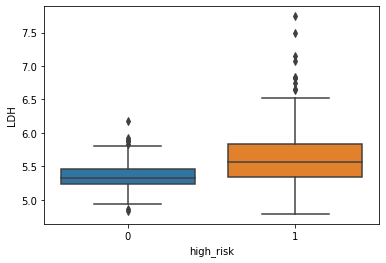

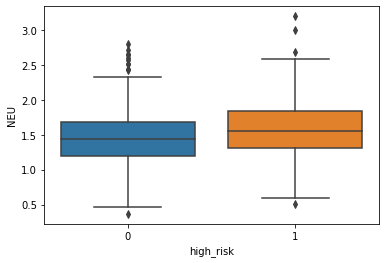

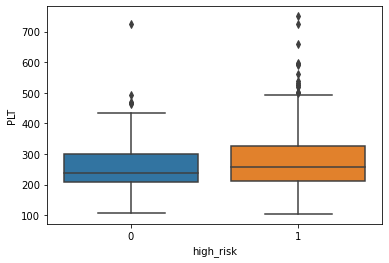

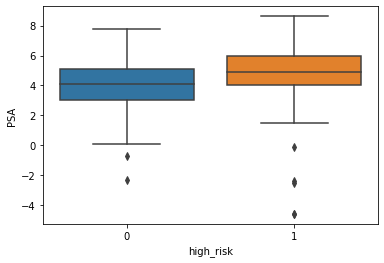

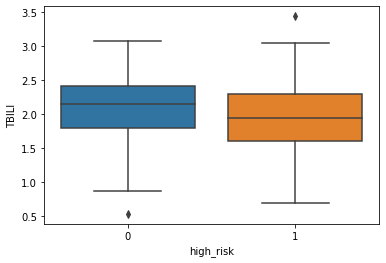

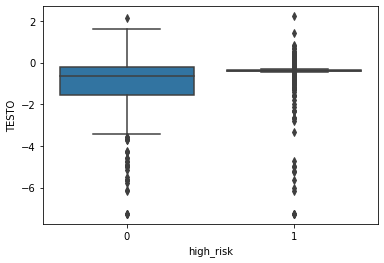

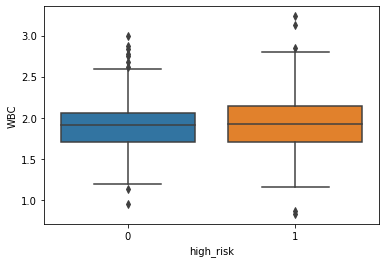

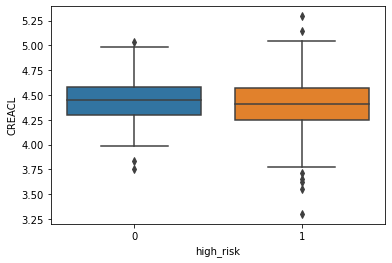

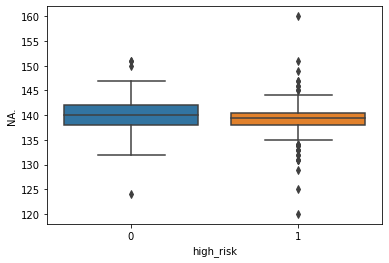

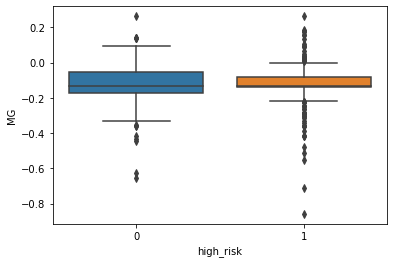

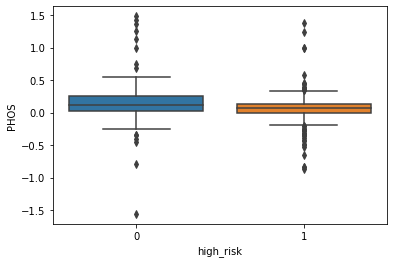

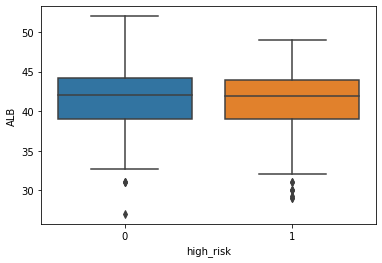

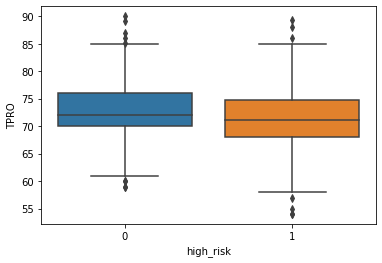

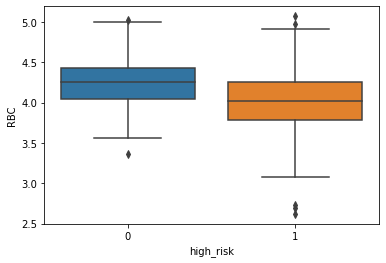

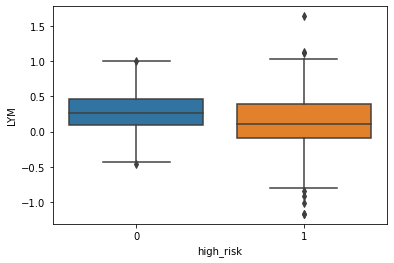

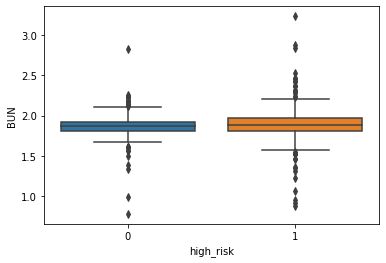

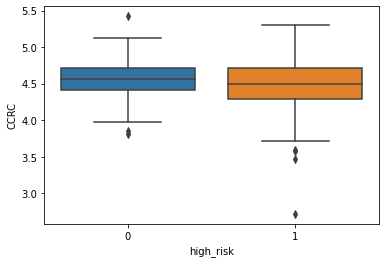

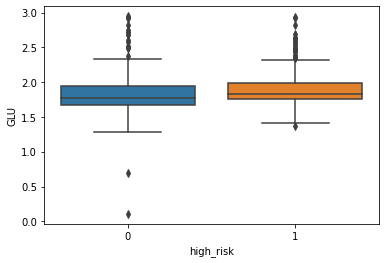

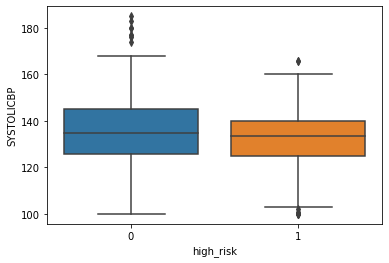

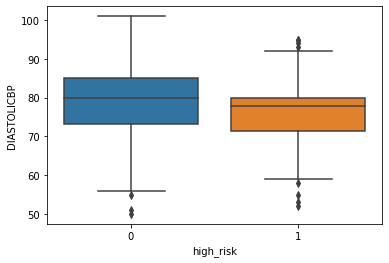

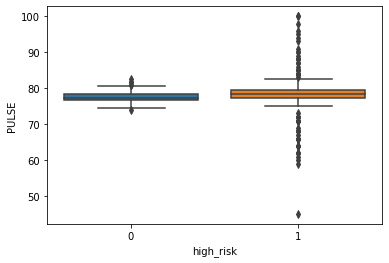

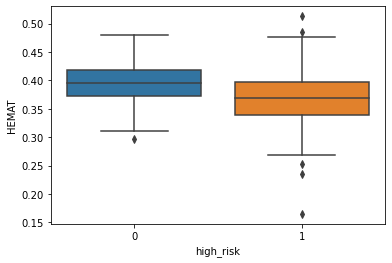

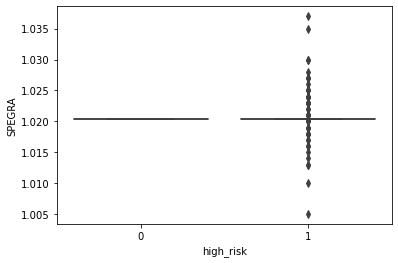

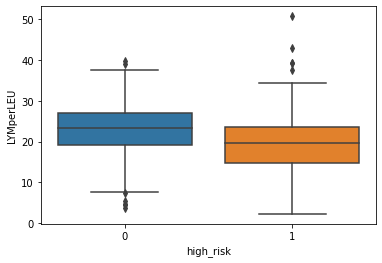

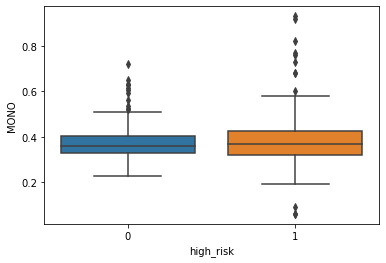

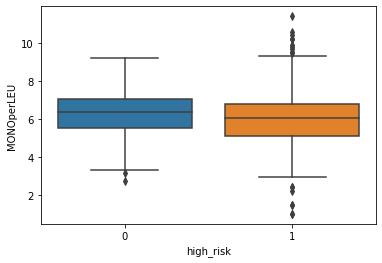

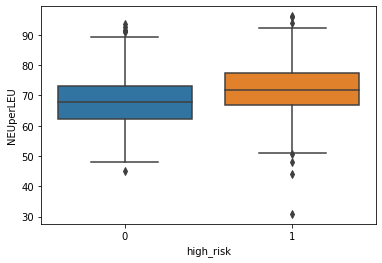

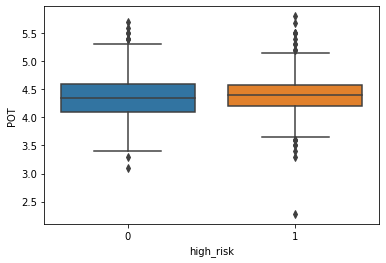

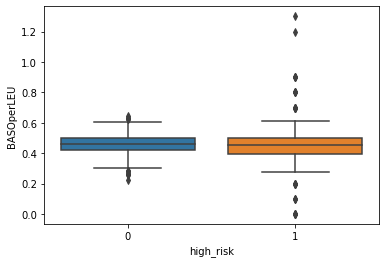

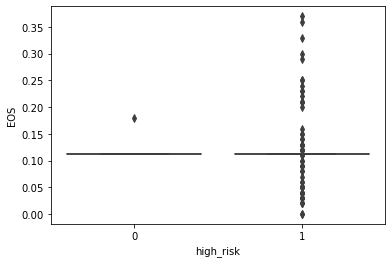

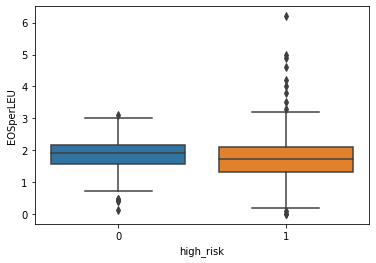

In [303]:
for feature in continous:
    analyse_continuous(feature)

In [304]:
continous_stats


,Name,Stat,p
0,BMI,1.346411,1.787156e-01
1,HEIGHTBL,-1.808549,7.105836e-02
2,WEIGHTBL,0.357967,7.205029e-01
3,ALP,-9.291229,3.373865e-19
4,ALT,0.030908,9.753541e-01
5,AST,-6.278501,6.867650e-10
6,CA,2.147203,3.220649e-02
7,CREAT,-1.250974,2.114673e-01
8,HB,8.226833,1.356103e-15
9,LDH,-9.551610,3.968658e-20


In [305]:
continous_stats.sort_values(by='p')

,Name,Stat,p
9,LDH,-9.551610,3.968658e-20
3,ALP,-9.291229,3.373865e-19
8,HB,8.226833,1.356103e-15
22,RBC,7.813192,2.777948e-14
30,HEMAT,7.809440,2.853525e-14
5,AST,-6.278501,6.867650e-10
32,LYMperLEU,5.486445,6.223597e-08
12,PSA,-5.368312,1.166750e-07
35,NEUperLEU,-4.931753,1.076228e-06
23,LYM,4.631892,4.511599e-06


In [306]:
continous_stats[continous_stats['p'] <= 0.0005].sort_values(by='p')


,Name,Stat,p
9,LDH,-9.551610,3.968658e-20
3,ALP,-9.291229,3.373865e-19
8,HB,8.226833,1.356103e-15
22,RBC,7.813192,2.777948e-14
30,HEMAT,7.809440,2.853525e-14
5,AST,-6.278501,6.867650e-10
32,LYMperLEU,5.486445,6.223597e-08
12,PSA,-5.368312,1.166750e-07
35,NEUperLEU,-4.931753,1.076228e-06
23,LYM,4.631892,4.511599e-06
